# EDA 1

In [3]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_parquet(Path("data") / "train.parquet")
data.head(5)

counter_id              counter_name    site_id  \
48321  100007049-102007049  28 boulevard Diderot E-O  100007049   
48324  100007049-102007049  28 boulevard Diderot E-O  100007049   
48327  100007049-102007049  28 boulevard Diderot E-O  100007049   
48330  100007049-102007049  28 boulevard Diderot E-O  100007049   
48333  100007049-102007049  28 boulevard Diderot E-O  100007049   

                  site_name  bike_count                date  \
48321  28 boulevard Diderot         0.0 2020-09-01 02:00:00   
48324  28 boulevard Diderot         1.0 2020-09-01 03:00:00   
48327  28 boulevard Diderot         0.0 2020-09-01 04:00:00   
48330  28 boulevard Diderot         4.0 2020-09-01 15:00:00   
48333  28 boulevard Diderot         9.0 2020-09-01 18:00:00   

      counter_installation_date         coordinates counter_technical_id  \
48321                2013-01-18  48.846028,2.375429          Y2H15027244   
48324                2013-01-18  48.846028,2.375429          Y2H15027244   
48327                2013-01-18  48.846028,2.375429          Y2H15027244   
48330                2013-01-18  48.846028,2.375429          Y2H15027244   
48333                2013-01-18  48.846028,2.375429          Y2H15027244   

        latitude  longitude  log_bike_count  
48321  48.846028   2.375429        0.000000  
48324  48.846028   2.375429        0.693147  
48327  48.846028   2.375429        0.000000  
48330  48.846028   2.375429        1.609438  
48333  48.846028   2.375429        2.302585

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496827 entries, 48321 to 929187
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   counter_id                 496827 non-null  category      
 1   counter_name               496827 non-null  category      
 2   site_id                    496827 non-null  int64         
 3   site_name                  496827 non-null  category      
 4   bike_count                 496827 non-null  float64       
 5   date                       496827 non-null  datetime64[us]
 6   counter_installation_date  496827 non-null  datetime64[us]
 7   coordinates                496827 non-null  category      
 8   counter_technical_id       496827 non-null  category      
 9   latitude                   496827 non-null  float64       
 10  longitude                  496827 non-null  float64       
 11  log_bike_count             496827 non-null  float64  

In [6]:
data.nunique(axis=0)

counter_id                     56
counter_name                   56
site_id                        30
site_name                      30
bike_count                    998
date                         8974
counter_installation_date      22
coordinates                    30
counter_technical_id           30
latitude                       30
longitude                      30
log_bike_count                998
dtype: int64

In [7]:
data.describe()

site_id     bike_count                        date  \
count  4.968270e+05  496827.000000                      496827   
mean   1.053450e+08      60.191475  2021-03-08 07:25:59.668858   
min    1.000070e+08       0.000000         2020-09-01 01:00:00   
25%    1.000475e+08       5.000000         2020-12-05 22:00:00   
50%    1.000562e+08      29.000000         2021-03-08 11:00:00   
75%    1.000563e+08      79.000000         2021-06-09 14:00:00   
max    3.000147e+08    1302.000000         2021-09-09 23:00:00   
std    3.210346e+07      87.590566                         NaN   

        counter_installation_date       latitude      longitude  \
count                      496827  496827.000000  496827.000000   
mean   2019-04-04 07:24:35.245911      48.854343       2.345479   
min           2013-01-18 00:00:00      48.826360       2.265420   
25%           2018-11-29 00:00:00      48.840801       2.314440   
50%           2019-11-06 00:00:00      48.852090       2.353870   
75%           2019-12-11 00:00:00      48.864610       2.375870   
max           2020-11-29 00:00:00      48.891720       2.409690   
std                           NaN       0.018554       0.038026   

       log_bike_count  
count   496827.000000  
mean         3.079917  
min          0.000000  
25%          1.791759  
50%          3.401197  
75%          4.382027  
max          7.172425  
std          1.659899

In [8]:
date_to_check = '1970-01-19 10:00:00'
if date_to_check in data['date'].dt.strftime('%Y-%m-%d %H:%M:%S').values:
    print("Date is in the table")
else:
    print("Date is not in the table")

Date is not in the table


In [5]:
from  ydata_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#! pip install skrub

In [39]:
from skrub import TableReport

In [40]:
TableReport(data)

Processing column  12 / 12


<TableReport: use .open() to display>

In [ ]:
data = pd.read_parquet(Path("data") / "train.parquet")
data.to_excel('output.xlsx', index=False)

Let's look at the most frequented stations:

In [9]:
(
    data.groupby(["site_name", "counter_name"])["bike_count"].sum()
    .sort_values(ascending=False)
    .head(10)
    .to_frame()
)

C:\Users\emman\AppData\Local\Temp\ipykernel_38768\1192055722.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["site_name", "counter_name"])["bike_count"].sum()


bike_count
site_name                        counter_name                                    
Totem 73 boulevard de Sébastopol Totem 73 boulevard de Sébastopol S-N   1992227.0
Totem 64 Rue de Rivoli           Totem 64 Rue de Rivoli O-E             1551730.0
Totem 73 boulevard de Sébastopol Totem 73 boulevard de Sébastopol N-S   1497912.0
67 boulevard Voltaire SE-NO      67 boulevard Voltaire SE-NO            1130565.0
Totem 64 Rue de Rivoli           Totem 64 Rue de Rivoli E-O             1015875.0
27 quai de la Tournelle          27 quai de la Tournelle SE-NO           984914.0
Quai d'Orsay                     Quai d'Orsay E-O                        948357.0
Totem Cours la Reine             Totem Cours la Reine O-E                894937.0
Face au 48 quai de la marne      Face au 48 quai de la marne SO-NE       884907.0
                                 Face au 48 quai de la marne NE-SO       833657.0

Map Visuals

In [65]:
import folium

m = folium.Map(location=data[["latitude", "longitude"]].mean(axis=0), zoom_start=13)

for _, row in (
    data[["counter_name", "latitude", "longitude"]]
    .drop_duplicates("counter_name")
    .iterrows()
):
    folium.Marker(
        row[["latitude", "longitude"]].values.tolist(), popup=row["counter_name"]
    ).add_to(m)

m

c:\ProgramData\Anaconda3\envs\bikes-count\lib\site-packages\folium\utilities.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords = (location[0], location[1])


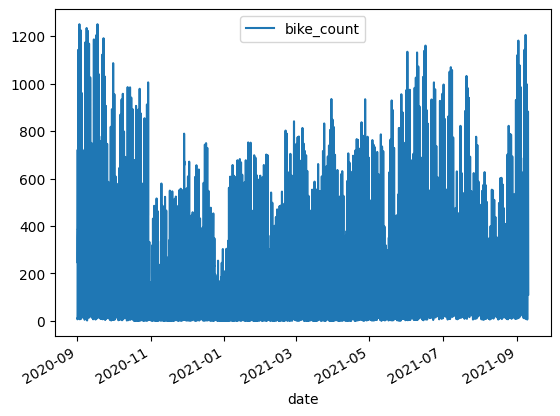

In [11]:
mask = data["counter_name"] == "Totem 73 boulevard de Sébastopol S-N"
data_sorted = data[mask].sort_values(by='date')
ax = data_sorted.plot(x="date", y="bike_count")
plt.show()

In [1]:
mask = (data["counter_name"] == "Totem 73 boulevard de Sébastopol S-N")

data[mask].groupby(
    pd.Grouper(freq="1w", key="date")
)[["bike_count"]].sum().plot()

NameError: name 'data' is not defined

In [15]:
sns.pairplot(data)

: 

# EDA 2

In [73]:
df = data.copy()

**Peak usage times**

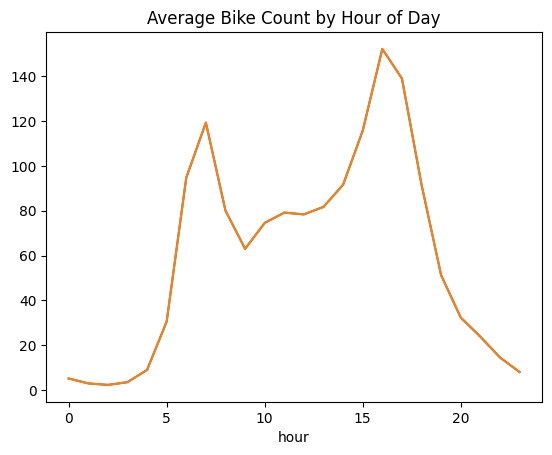

In [44]:
df['hour'] = df['date'].dt.hour
df.groupby('hour')['bike_count'].mean().plot(kind='line', title='Average Bike Count by Hour of Day')
plt.show()

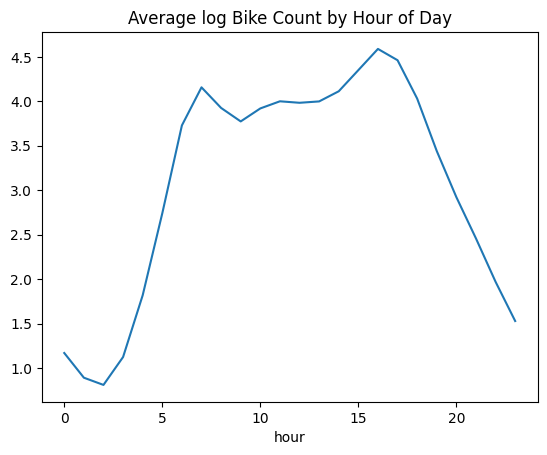

In [51]:
df['hour'] = df['date'].dt.hour
df.groupby('hour')['log_bike_count'].mean().plot(kind='line', title='Average log Bike Count by Hour of Day')
plt.show()

==> On average, people use their bicycles the most between 6 AM and 5 PM.
  

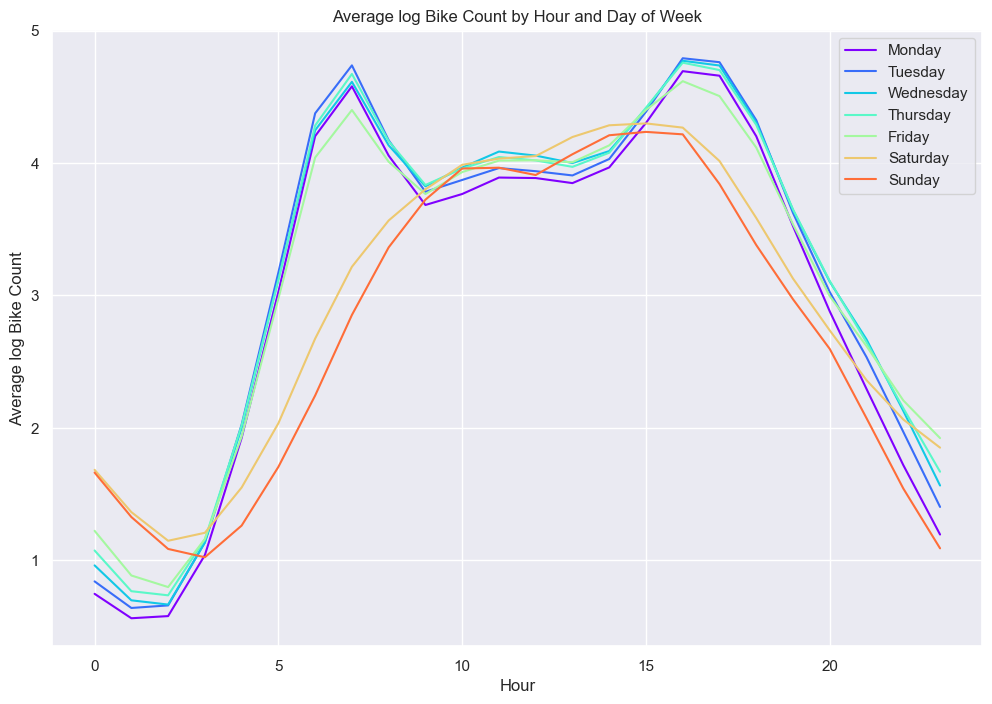

In [22]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(12, 8))

for i, day in enumerate(days):
    day_df = df[df['day_of_week'] == day]
    day_df.groupby('hour')['log_bike_count'].mean().plot(kind='line', ax=ax, label=day, color=plt.cm.rainbow(i/7))

ax.set_title('Average log Bike Count by Hour and Day of Week')
ax.set_xlabel('Hour')
ax.set_ylabel('Average log Bike Count')
ax.legend()
plt.show()

===> There is a clear distinction between the trend of weekdays and weekend days  
===> The peak of bicycle counts are higher during weekdays. From the next code cell below, we can also see that the bicycles are less used on the weekends    
===> From Monday to Sunday, the number of bikes used between midnight and 2 AM increases, showing that people tend to use their bikes later at night as the week goes by.

In [ ]:
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()
#df.groupby('hour', 'day_of_week')['log_bike_count'].mean().plot(kind='line', title=f'Average log Bike Count by Hour for ')
sns.lineplot(x='hour', y='log_bike_count', hue='day_of_week', data=df)
plt.title('Average log Bike Count by Hour and Day of Week')
#plt.show()

Text(0.5, 1.0, 'Average log Bike Count by Day of Week')

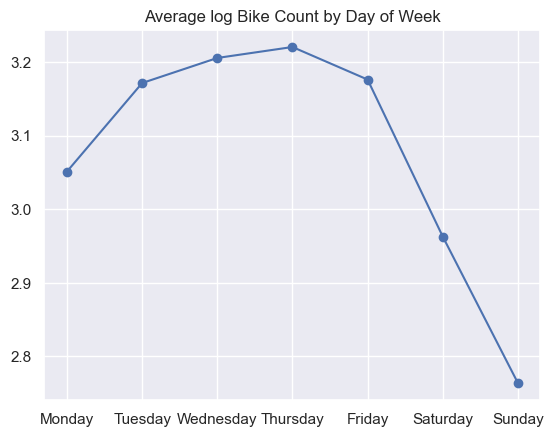

In [37]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_log_bikes_per_day = df[df['day_of_week'].isin(days)].groupby('day_of_week')['log_bike_count'].mean().reindex(days)
plt.plot(avg_log_bikes_per_day, marker='o')
plt.title('Average log Bike Count by Day of Week')

===> We can see that the bicycles are less used on the weekends. Let's see if it is the same based on the season of the year

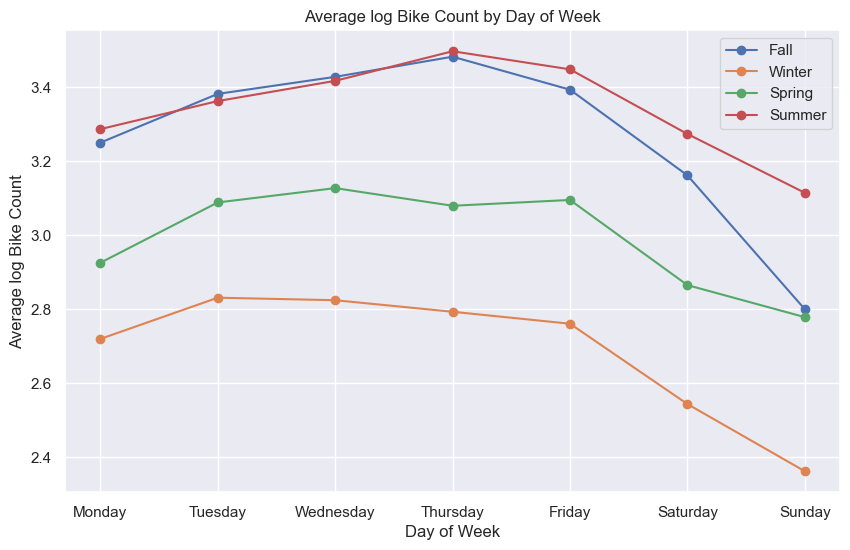

In [46]:
df['month'] = df['date'].dt.month
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Define the seasons based on the month
seasons = {
    'Fall': [9, 10, 11],
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8]
}

fig, ax = plt.subplots(figsize=(10, 6))

for season, months in seasons.items():
    season_df = df[df['month'].isin(months)]
    avg_log_bikes_per_day = season_df.groupby('day_of_week')['log_bike_count'].mean().reindex(days)
    ax.plot(avg_log_bikes_per_day, label=season, marker='o')

ax.set_title('Average log Bike Count by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average log Bike Count')
ax.legend()
plt.show()

===> Without big surpise, Summer is the period where bicycles are used the most and Winter where they are used the least.  
===> Bicycles are used approximately 10% less in spring than they are in Fall.  


**Let's also observe the evolution of log_bike_count month per month**

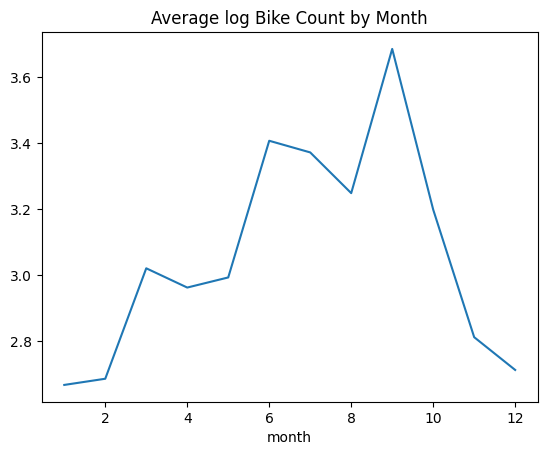

In [55]:
df['month'] = df['date'].dt.month
df.groupby('month')['log_bike_count'].mean().plot(kind='line', title='Average log Bike Count by Month')
plt.show()

===> There are sudden changes from  
       _ february(2) to March(3), probably due to change from Winter to Spring  
       _ may(5) to june(6)  
       _ august(8) to september(9)  
       
Since 2020 was the year of COVID, maybe some news related to health measures have affected the spike observed in some sense.    


**Let's see if there is a difference between September 2020 and September 2021 in terms of log_bike_count**

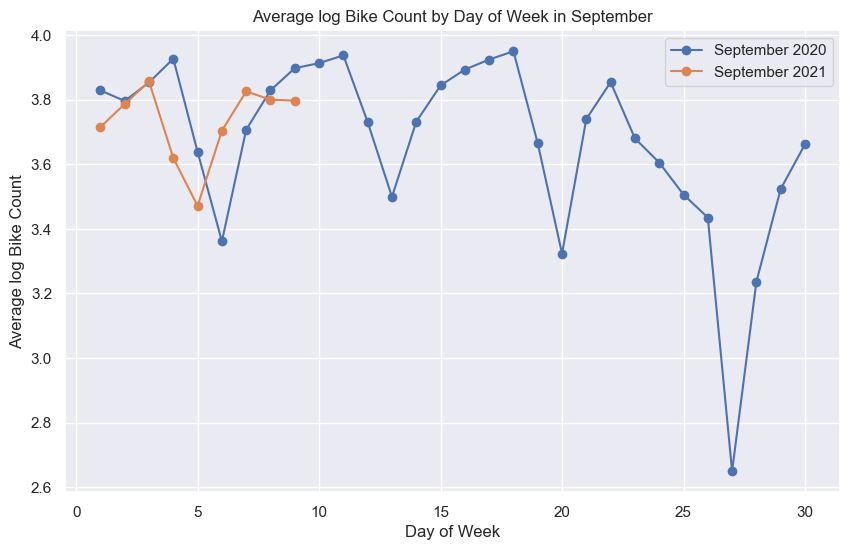

In [49]:
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day
df_september_2020 = df[(df['year'] == 2020) & (df['month'] == 9)]
df_september_2021 = df[(df['year'] == 2021) & (df['month'] == 9)]

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_september_2020.groupby('day')['log_bike_count'].mean(), label='September 2020', marker='o')
ax.plot(df_september_2021.groupby('day')['log_bike_count'].mean(), label='September 2021', marker='o')

ax.set_title('Average log Bike Count by Day of Week in September')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average log Bike Count')
ax.legend()
plt.show()

===> The dataset stops on september 9th for 2021, but the trend of log_bike_count for 2020 and 2021 for the first week are similar 

**Time series decomposition**

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

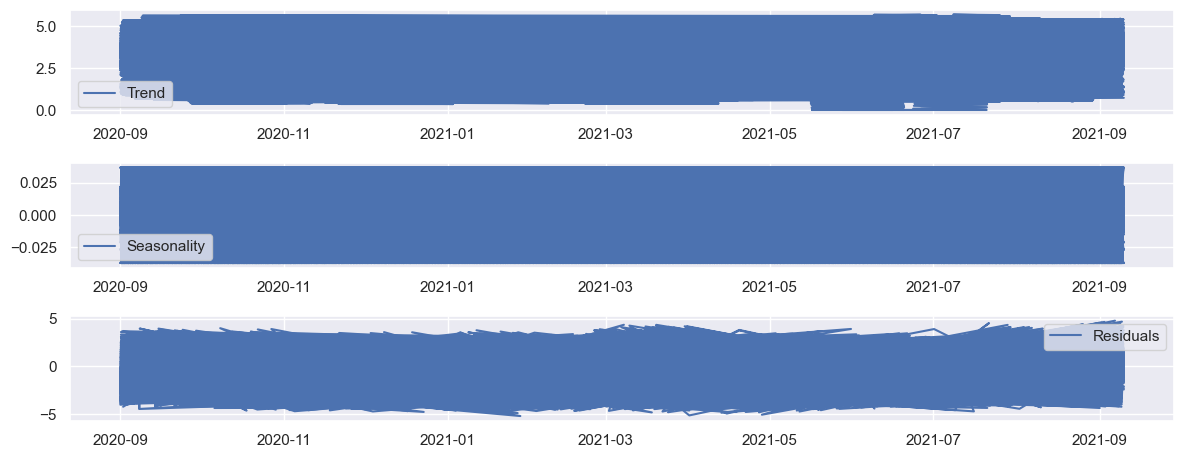

In [60]:
#df.set_index('date', inplace=True)
decomposition = seasonal_decompose(df['log_bike_count'], model='additive', period=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Stationary Testing

In [61]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['log_bike_count'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -14.76155016866836
p-value: 2.397933430388243e-27


Autocorrelation and Partial Autocorrelation

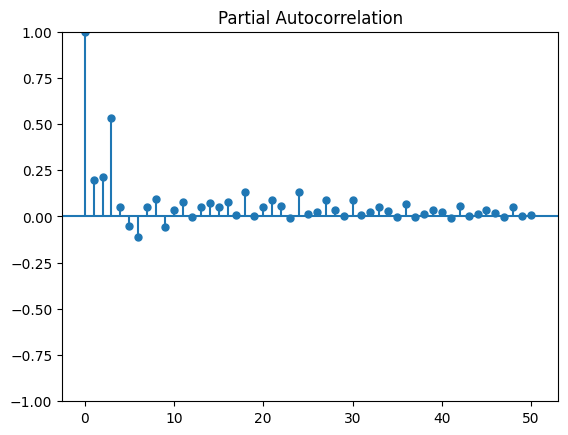

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['log_bike_count'], lags=50)
plot_pacf(df['log_bike_count'], lags=50)

Outlier detection

In [62]:
df.boxplot(column='log_bike_count', by='month', grid=True)
plt.show()

KeyError: 'month'

Relationship with External Variables


In [ ]:
#df.plot.scatter(x='temperature', y='log_bike_count', title='log Bike Count vs. Temperature')
#plt.show() 

Aggregate Analysis by Sites

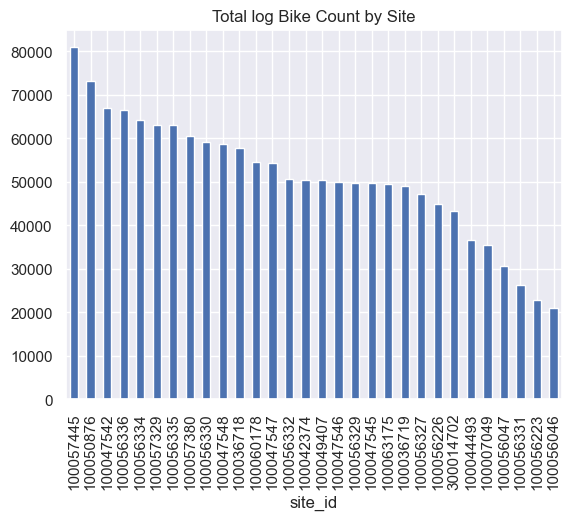

In [63]:
df.groupby('site_id')['log_bike_count'].sum().sort_values(ascending=False).plot(kind='bar', title='Total log Bike Count by Site')
plt.show()

===> The log bike count of the top 7 is at least two time larger than the log bike count of the bottom 4  

===> **Let's visualise them on the map with green for top 7 and red for bottom 7**

In [69]:
top_7_sites = df.groupby('site_id')['log_bike_count'].sum().nlargest(7)
bottom_4_sites = df.groupby('site_id')['log_bike_count'].sum().nsmallest(4)

m = folium.Map(location=data[["latitude", "longitude"]].mean(axis=0), zoom_start=13)

for site_id, log_bike_count in top_7_sites.items():
    folium.Marker(
        data[data['site_id'] == site_id][["latitude", "longitude"]].values.tolist()[0],
        popup=f"{site_id}: {log_bike_count}",
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(m)

for site_id, log_bike_count in bottom_4_sites.items():
    folium.Marker(
        data[data['site_id'] == site_id][["latitude", "longitude"]].values.tolist()[0],
        popup=f"{site_id}: {log_bike_count}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

m

c:\ProgramData\Anaconda3\envs\bikes-count\lib\site-packages\folium\utilities.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords = (location[0], location[1])


===> the green ones are mostly in the same area, but one of them (id=100056335) is among two red ones (ids=100056046, 100056223)  
===> **Let's have a closer look to those 3 counters**

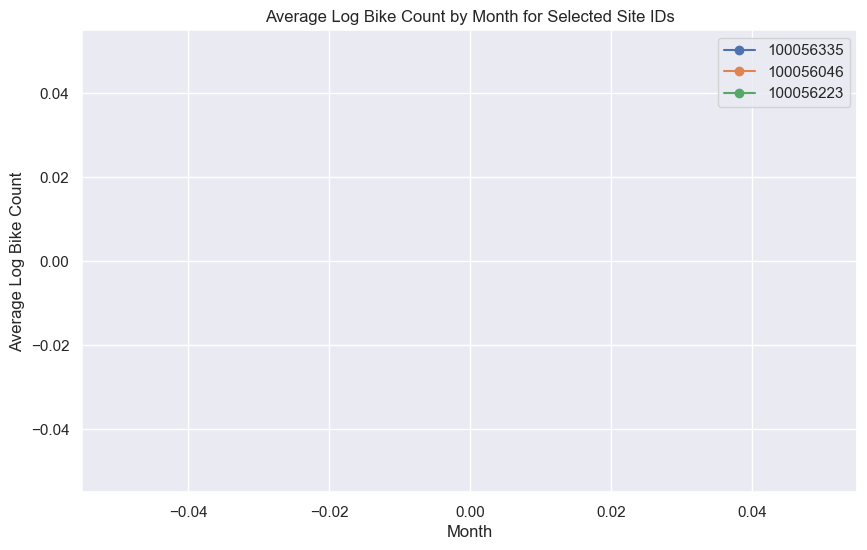

In [76]:
site_ids = ['100056335', '100056046', '100056223']

df = data.copy()
df['month'] = df['date'].dt.month
site_data = df[df['site_id'].isin(site_ids)]

fig, ax = plt.subplots(figsize=(10, 6))

for site_id in site_ids:
    site_data_filtered = site_data[site_data['site_id'] == site_id]
    site_data_filtered.groupby('month')['log_bike_count'].mean().plot(ax=ax, label=site_id, marker='o')

ax.set_title('Average Log Bike Count by Month for Selected Site IDs')
ax.set_xlabel('Month')
ax.set_ylabel('Average Log Bike Count')
ax.legend()
plt.show()

**Extenting the map visualisation to top 10 and bottom 10**

In [70]:
top_10_sites = df.groupby('site_id')['log_bike_count'].sum().nlargest(7)
bottom_10_sites = df.groupby('site_id')['log_bike_count'].sum().nsmallest(10)

m = folium.Map(location=data[["latitude", "longitude"]].mean(axis=0), zoom_start=13)

for site_id, log_bike_count in top_10_sites.items():
    folium.Marker(
        data[data['site_id'] == site_id][["latitude", "longitude"]].values.tolist()[0],
        popup=f"{site_id}: {log_bike_count}",
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(m)

for site_id, log_bike_count in bottom_10_sites.items():
    folium.Marker(
        data[data['site_id'] == site_id][["latitude", "longitude"]].values.tolist()[0],
        popup=f"{site_id}: {log_bike_count}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)

m

c:\ProgramData\Anaconda3\envs\bikes-count\lib\site-packages\folium\utilities.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords = (location[0], location[1])


Heatmap of usage

<Axes: xlabel='day', ylabel='hour'>

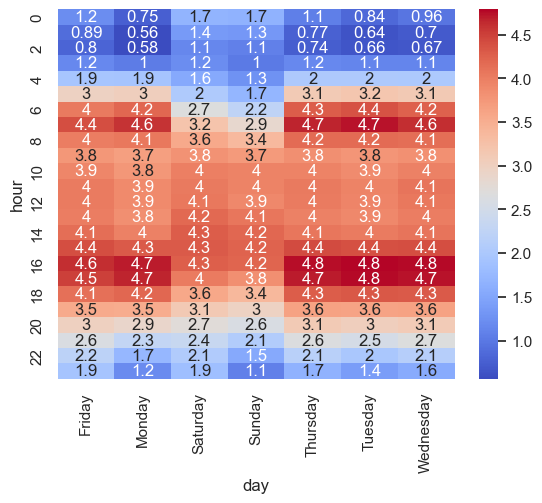

In [ ]:
df = data.copy()
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day_name()

pivot_table = df.pivot_table(index='hour', columns='day', values='log_bike_count', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)

**Time Series Line Plot**

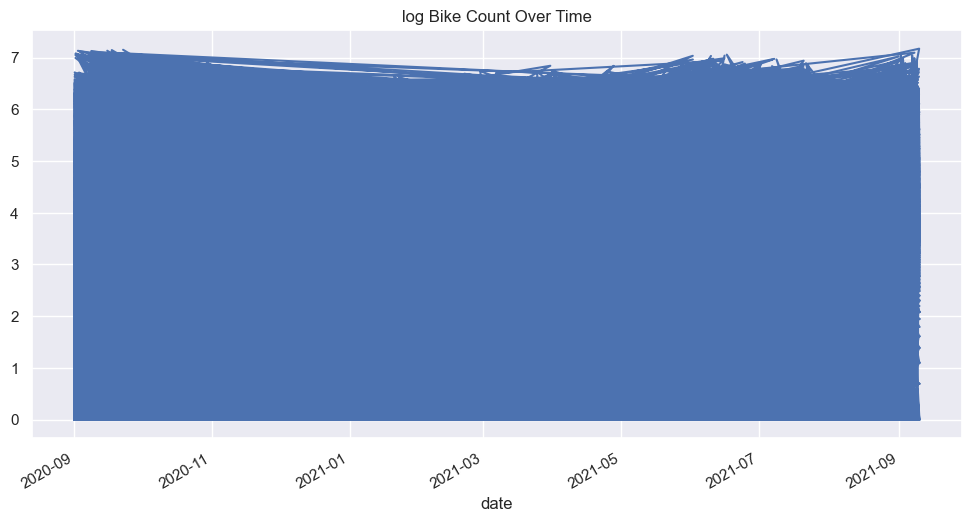

In [80]:
df.set_index('date')['log_bike_count'].plot(title='log Bike Count Over Time', figsize=(12, 6))
plt.show()

**Distribution of Counts**

<Axes: title={'center': 'Distribution of log Bike Counts'}, ylabel='Frequency'>

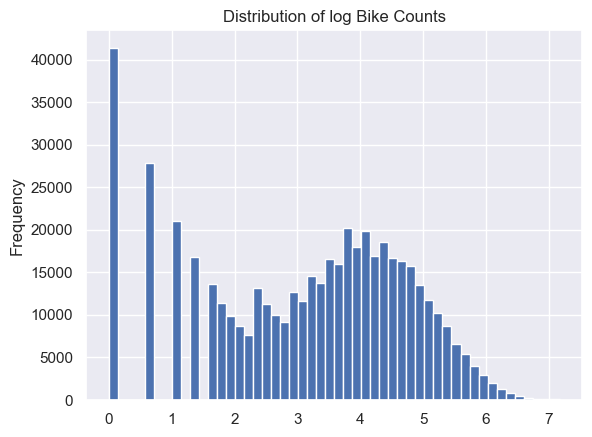

In [81]:
df['log_bike_count'].plot(kind='hist', bins=50, title='Distribution of log Bike Counts')

===> How to deal with the skewness + normal-distribution-like shape of this plot ? 

**Lag plots**

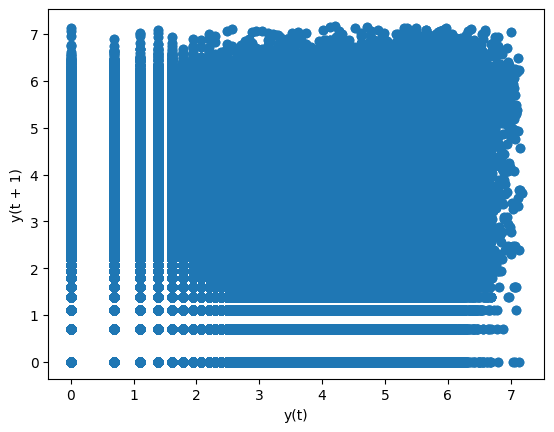

In [75]:
from pandas.plotting import lag_plot
lag_plot(df['log_bike_count'])
plt.show()

# After EDA 

Do outliers align with specific holidays or city events?

non-stationary times series

Use autocorrelation analysis (ACF, PACF) to identify lagged relationships.
